In [43]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [45]:
def connect_to_database():
    return mysql.connector.connect(
        host="",
        database="",
        user="",
        password="",
        charset=''  # Especifica el uso de UTF-8
    )


In [46]:
def run_query(query):
    db = connect_to_database()  # Conecta a la base de datos
    cursor = db.cursor()        # Crea un cursor para ejecutar comandos SQL
    cursor.execute(query)       # Ejecuta la consulta SQL proporcionada
    
    # Recupera todos los resultados de la consulta
    result = cursor.fetchall()
    
    # Recupera los nombres de las columnas
    columns = [desc[0] for desc in cursor.description]
    
    cursor.close()              # Cierra el cursor
    db.close()                  # Cierra la conexión a la base de datos
    
    # Convierte los resultados en un DataFrame de Pandas
    return pd.DataFrame(result, columns=columns)

In [47]:
query1 = """
SELECT * FROM VistaPartidos;
"""
df1 = run_query(query1)
df1


,fecha_partido,estadisticas,id_torneo,goles_equipo_visitante,goles_local,nombre_equipo_local,nombre_equipo_visitante,ganador,fecha_registroBD
0,2023-11-16,None,3,1.0,2.0,Colombia,Brasil,Holi que más,None
1,2023-09-07,None,3,0.0,1.0,Colombia,Venezuela\r\n,olas,None
2,2023-10-12,None,3,2.0,2.0,Colombia,Uruguay\r\n,None,None
3,2023-11-16,None,3,1.0,2.0,Colombia,Brasil,None,None
4,2024-09-10,None,3,NaN,NaN,Colombia,Argentina,None,None
...,...,...,...,...,...,...,...,...,...
7520,2024-04-21,None,24,2.0,1.0,Monza\r\n,Atalanta,None,2024-07-23
7521,2024-05-04,None,24,2.0,2.0,Monza\r\n,Lazio,None,2024-07-23
7522,2024-05-19,None,24,1.0,0.0,Monza\r\n,Frosinone,None,2024-07-23
7523,2024-08-19,None,25,NaN,NaN,Real Valladolid,Espanyol,None,2024-08-01


In [48]:
query2 = """
SELECT 
    equipo, 
    SUM(victorias) AS partidos_ganados, 
    SUM(empates) AS partidos_empatados, 
    SUM(derrotas) AS partidos_perdidos 
FROM 
    ( 
        SELECT 
            nombre_equipo_local AS equipo, 
            (goles_local > goles_equipo_visitante) AS victorias,
            (goles_local = goles_equipo_visitante) AS empates, 
            (goles_local < goles_equipo_visitante) AS derrotas 
        FROM 
            VistaPartidos 
        WHERE 
            id_torneo = 5 or id_torneo=6 or id_torneo=7 or id_torneo=26
        
        UNION ALL 
        
        SELECT 
            nombre_equipo_visitante AS equipo, 
            (goles_equipo_visitante > goles_local) AS victorias, 
            (goles_equipo_visitante = goles_local) AS empates, 
            (goles_equipo_visitante < goles_local) AS derrotas 
        FROM 
            VistaPartidos 
        WHERE 
            id_torneo = 5 or id_torneo=6 or id_torneo=7 or id_torneo=26
            
    ) AS subconsulta  
GROUP BY 
    equipo 
ORDER BY 
    partidos_ganados DESC;
"""

In [49]:
df2 = run_query(query2)
df2

,equipo,partidos_ganados,partidos_empatados,partidos_perdidos
0,Arsenal,96,12,27
1,M. City,94,27,12
2,Liverpool,77,38,20
3,Tottenham,69,21,43
4,M. United,64,32,39
5,Chelsea,60,34,39
6,Newcastle,57,41,36
7,Aston Villa,57,29,49
8,Brighton,50,40,46
9,West Ham,47,31,57


) missing from font(s) DejaVu Sans.pykernel_8268\850756753.py:22: UserWarning: Glyph 13 (
  plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
) missing from font(s) DejaVu Sans.lwebscrapp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


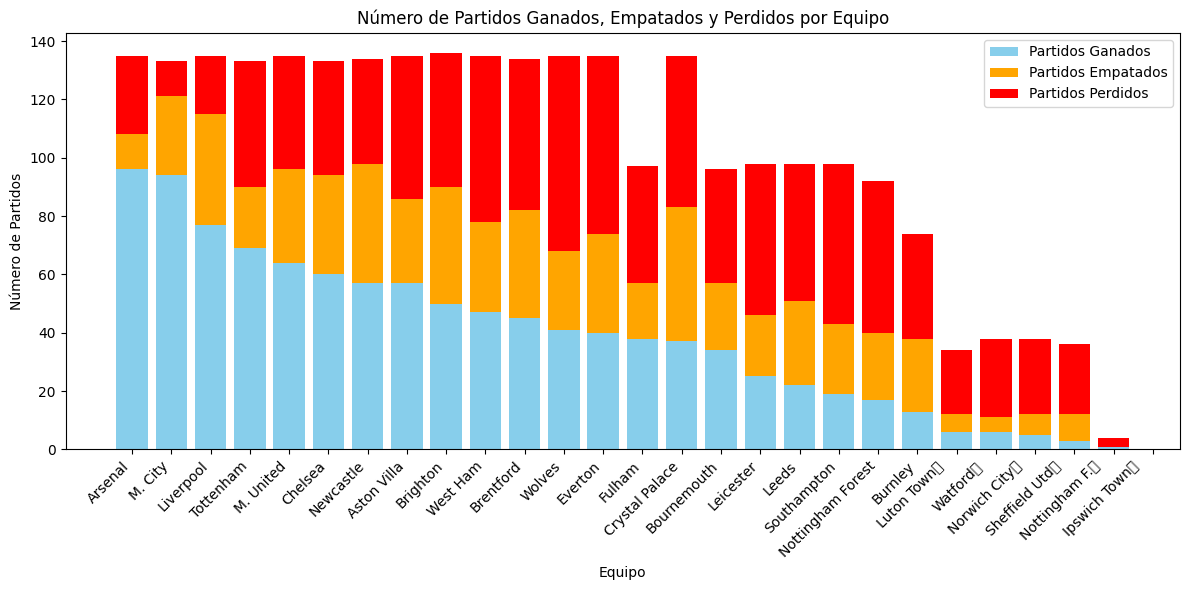

In [50]:
import matplotlib.pyplot as plt

# Supongamos que df2 es el DataFrame que has obtenido
# df2 = run_query(query2)

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario

# Configura las barras
plt.bar(df2['equipo'], df2['partidos_ganados'], color='skyblue', label='Partidos Ganados')
plt.bar(df2['equipo'], df2['partidos_empatados'], color='orange', bottom=df2['partidos_ganados'], label='Partidos Empatados')
plt.bar(df2['equipo'], df2['partidos_perdidos'], color='red', bottom=df2['partidos_ganados'] + df2['partidos_empatados'], label='Partidos Perdidos')

# Configura los ejes y el título
plt.xlabel('Equipo')
plt.ylabel('Número de Partidos')
plt.title('Número de Partidos Ganados, Empatados y Perdidos por Equipo')
plt.xticks(rotation=45, ha='right')  # Rote los nombres de los equipos si es necesario
plt.legend()

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()

In [51]:
queryELO = """
SELECT * FROM vista_elo;
"""
dfELO= run_query(queryELO)
dfELO

,id,id_partido,id_local,id_visitante,elo_local_antes,elo_local_despues,elo_visitante_antes,elo_visitante_despues,Equipo_local,Equipo_visitante
0,299,35517,2,15,None,1934.0,None,1762.0,Medellín,Once Caldas
1,322,35540,2,3,None,1926.0,None,1867.0,Medellín,América
2,341,35559,2,13,None,1919.0,None,1879.0,Medellín,Bucaramanga
3,359,35577,2,5,None,1932.0,None,1858.0,Medellín,Nacional
4,288,35506,3,9,None,1846.0,None,1795.0,América,Alianza Petrolera
...,...,...,...,...,...,...,...,...,...,...
474,408,35626,177,155,None,2239.0,None,2421.0,Monza\r\n,Atalanta
475,422,35640,177,149,None,2244.0,None,2421.0,Monza\r\n,Lazio
476,445,35663,177,165,None,2253.0,None,2057.0,Monza\r\n,Frosinone
477,469,35687,178,179,None,NaN,None,NaN,Real Valladolid,Espanyol


In [52]:
# Consulta SQL
# Consulta SQL
queryEvolucionElo = """
SELECT 
    Equipo_local AS Equipo,
    id_local AS id_equipo,
    elo_local_despues AS elo_despues,
    id_partido,
    elo_visitante_despues AS elo_oponente
FROM 
    vista_elo 
WHERE 
    id_local = 70



UNION ALL

SELECT 
    Equipo_visitante AS Equipo,
    id_visitante AS id_equipo,
    elo_visitante_despues AS elo_despues,
    id_partido,
    elo_local_despues AS elo_oponente
FROM 
    vista_elo 
WHERE 
    id_visitante = 70


ORDER BY 
    id_partido ASC;
"""


# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)

       Equipo  id_equipo  elo_despues  id_partido  elo_oponente
0   M. United         70       2118.0       35297        1744.0
1   M. United         70       2120.0       35303        2011.0
2   M. United         70       2127.0       35315        2092.0
3   M. United         70       2116.0       35323        2179.0
4   M. United         70       2128.0       35331        2021.0
5   M. United         70       2135.0       35344        1772.0
6   M. United         70       2137.0       35355        2039.0
7   M. United         70       2144.0       35367        2111.0
8   M. United         70       2133.0       35375        2166.0
9   M. United         70       2144.0       35383        2046.0
10  M. United         70       2151.0       35397        2121.0
11  M. United         70       2160.0       35400        1915.0
12  M. United         70       2164.0       35417        2022.0
13  M. United         70       2150.0       35426        2248.0
14  M. United         70       2143.0   

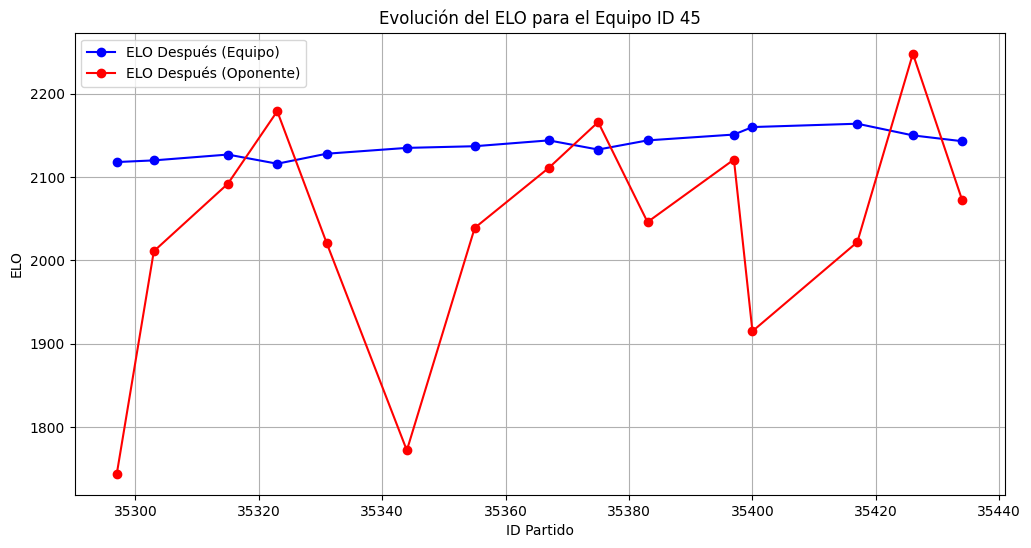

In [53]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar ELO después del partido del equipo objetivo
plt.plot(dfEvolucionElo['id_partido'], dfEvolucionElo['elo_despues'], marker='o', linestyle='-', color='blue', label='ELO Después (Equipo)')

# Graficar ELO después del partido del oponente
plt.plot(dfEvolucionElo['id_partido'], dfEvolucionElo['elo_oponente'], marker='o', linestyle='-', color='red', label='ELO Después (Oponente)')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para el Equipo ID 45')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()



In [78]:
# Consulta SQL
queryEvolucionElo = """
SELECT 
    v.Equipo,
    v.id_equipo,
    v.elo_despues,
    v.id_partido,
    Partidos.id_torneo,
    v.elo_oponente
FROM 
    (
        SELECT 
            Equipo_local AS Equipo,
            id_local AS id_equipo,
            elo_local_despues AS elo_despues,
            id_partido,
            elo_visitante_despues AS elo_oponente
        FROM 
            vista_elo 
        WHERE 
            id_local IN (64, 77)

        UNION ALL

        SELECT 
            Equipo_visitante AS Equipo,
            id_visitante AS id_equipo,
            elo_visitante_despues AS elo_despues,
            id_partido,
            elo_local_despues AS elo_oponente
        FROM 
            vista_elo 
        WHERE 
            id_visitante IN (64, 77)
    ) v
INNER JOIN 
    Partidos
ON 
    Partidos.id_partido = v.id_partido
WHERE 
    Partidos.id_torneo IN (5, 6, 7, 26)
ORDER BY 
    v.id_partido ASC;
"""

# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)


               Equipo  id_equipo  elo_despues  id_partido  id_torneo  \
0   Nottingham Forest         77       1877.0       35291          5   
1         Bournemouth         64       2006.0       35295          5   
2         Bournemouth         64       2018.0       35300          5   
3   Nottingham Forest         77       1885.0       35307          5   
4         Bournemouth         64       2029.0       35308          5   
5         Bournemouth         64       2037.0       35317          5   
6   Nottingham Forest         77       1900.0       35325          5   
7   Nottingham Forest         77       1896.0       35327          5   
8         Bournemouth         64       2021.0       35331          5   
9   Nottingham Forest         77       1910.0       35338          5   
10        Bournemouth         64       2034.0       35342          5   
11  Nottingham Forest         77       1917.0       35351          5   
12        Bournemouth         64       2044.0       35352       

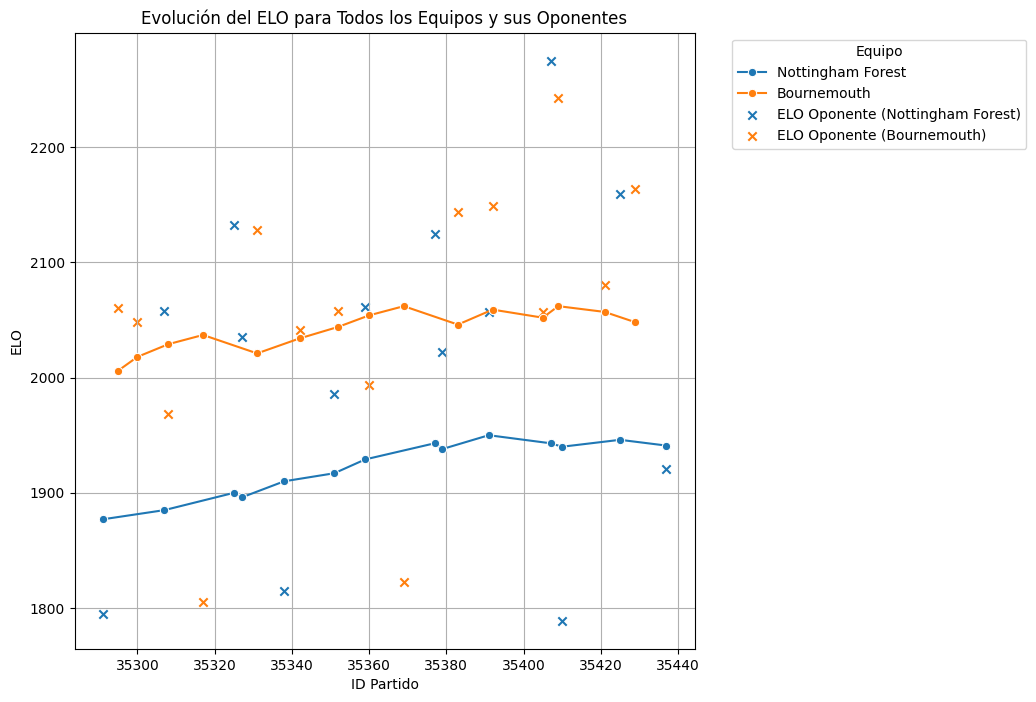

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(8, 8))

# Graficar ELO después del partido para los equipos
palette = sns.color_palette('tab10', n_colors=len(dfEvolucionElo['Equipo'].unique()))
team_colors = dict(zip(dfEvolucionElo['Equipo'].unique(), palette))

# Graficar ELO después del partido para los equipos
sns.lineplot(data=dfEvolucionElo, x='id_partido', y='elo_despues', hue='Equipo', marker='o', palette=team_colors, linestyle='-')

# Graficar ELO del oponente para los equipos
for equipo in dfEvolucionElo['Equipo'].unique():
    subset = dfEvolucionElo[dfEvolucionElo['Equipo'] == equipo]
    plt.scatter(subset['id_partido'], subset['elo_oponente'], marker='x', color=team_colors[equipo], label=f'ELO Oponente ({equipo})')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para Todos los Equipos y sus Oponentes')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar gráfico
plt.show()


